In [60]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from kjm2601 import obsidian_media_path as path


In [61]:
# Define a wavefunction. This is a wavefunction for a moving particle modelled as a wave packet.

def make_psi(x, sigma = 1.0, k = 3.0, x0 = 0.0):
    return np.exp(-0.5*((x-x0)/sigma)**2)*np.exp(1j*k*x)


def potential_step_scattering_state(x, V0 = 1.0, E = 0.5):
    V = np.zeros_like(x)
    V[(x > 0)] = V0
    
    A = 1.0
    k1 = np.sqrt(2*E)
    
    psi = np.zeros_like(x, dtype = complex)
    if E > V0:
        k2 = np.sqrt(E - V0)
        B = A * (k1/k2 - 1)/(k1/k2 + 1)
        C = A + B #* 2*k1/(k1 + k2)
        print(f"A = {A}, B = {B}, C = {C}")
        print(np.abs(A)**2, np.abs(B)**2, np.abs(C)**2)
        xx = x[x>0]
        psi[(x > 0)] = C*np.exp(1j*k2*xx)
    else:
        kappa = np.sqrt(V0 - E)
        B = A * (1j*k1 + kappa)/(1j*k1 - kappa)
        C = A + B
        xx = x[x>0]
        psi[(x > 0)] = C*np.exp(-kappa*xx)

    xx = x[x<=0]
    psi[(x <= 0)] = A*np.exp(1j*k1*xx) + B*np.exp(-1j*k1*xx)
    
    return V, psi
    


A = 1.0, B = 0.5519815245204083, C = 1.5519815245204083
1.0 0.30468360341187406 2.4086466524526906


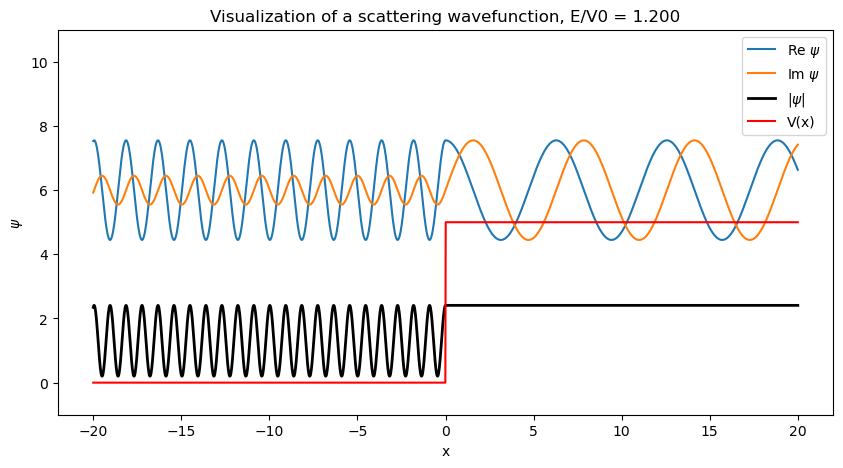

In [78]:
# Create a wavefunction
x = np.linspace(-20, 20, 2000)
V0 = 5
E = 6
V, psi = potential_step_scattering_state(x, V0 = V0, E = E)


energy_scale = 1.0
y_shift = E*energy_scale

plt.figure(figsize=(10, 5))
plt.plot(x, y_shift + np.real(psi), label='Re $\psi$')
plt.plot(x, y_shift + np.imag(psi), label='Im $\psi$')
plt.plot(x, np.abs(psi)**2, color='k', linewidth=2, label='$|\psi|$')
plt.plot(x, V * energy_scale, color='r', label='V(x)')
plt.ylim(-1, 2*V0*energy_scale + 1)
plt.xlabel('x')
plt.ylabel('$\psi$')
plt.legend(loc='upper right')
plt.title(f'Visualization of a scattering wavefunction, E/V0 = {E/V0:.3f}')
filename = path + f'lecture5_scattering_V0_{V0}_E_{E}.pdf'
plt.savefig(filename, bbox_inches='tight')
plt.show()



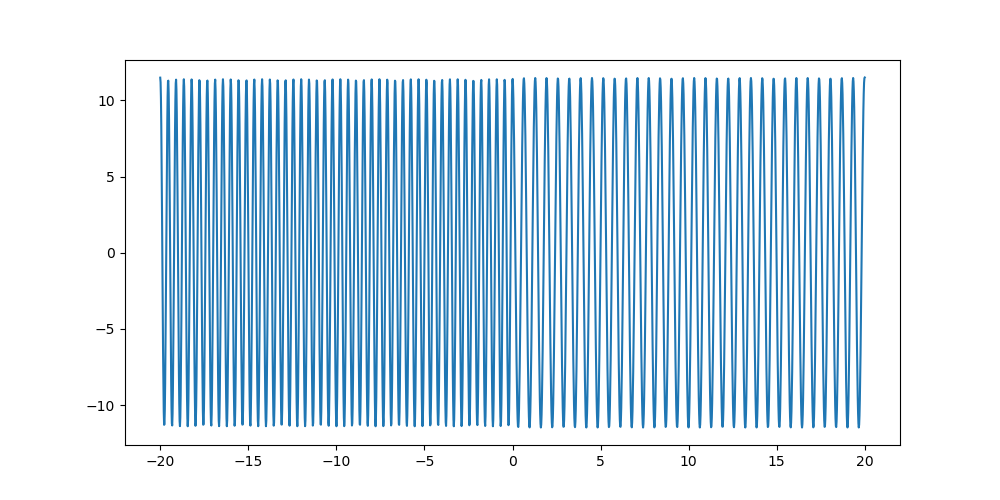

In [59]:
dpsidx = np.gradient(psi, x[1] - x[0])
plt.figure(figsize=(10, 5))
plt.plot(x, np.imag(dpsidx))
plt.show()